# Statistical Analysis

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns; sns.set_style('darkgrid')
from matplotlib import pyplot as plt

from scipy import stats

import yfinance as yf

In [2]:
def compare_lin_log_scale(Price):
    fig, axs = plt.subplots(ncols = 2, figsize = (12, 4))
    fig.suptitle('Simulated Market - Linear vs Log scale')
    sns.lineplot(
        data = Price, label = 'Price', ax = axs[0], lw = 1, color = 'red'
    )
    sns.lineplot(
        data = Price, label = 'Price', ax = axs[1], lw = 1, color = 'red'
    )

    axs[0].set_ylabel('Price'); axs[1].set_ylabel('Price')
    axs[0].set_xlabel('Step'); axs[1].set_xlabel('Step')

    axs[1].set_yscale('log')
    plt.show();

In [3]:
import sys
sys.path += ['../src/']

from statistical_analysis import get_returns
from statistical_analysis import get_aDF_test
from statistical_analysis import calc_ACF
from statistical_analysis import plot_ACF

In [4]:
def compare_returns(r_ret, s_ret, s_ret_old):
    fig, axs = plt.subplots(ncols = 3, figsize = (10, 3), sharey = True)
    fig.suptitle('Compare Returns - Models vs. Real market')
    sns.lineplot(
        data = s_ret_old.Price, label = 'previous model', ax = axs[0], lw = 0.3, color = 'blue'
    )
    sns.lineplot(
        data = s_ret, label = 'network model', ax = axs[1], lw = 0.3, color = 'red'
    )
    sns.lineplot(
        data = r_ret, label = 'real', ax = axs[2], lw = 0.5, color = 'gray'
    )
    
    axs[0].set_ylabel('Log Returns')
    axs[0].set_xlabel('Step'); axs[1].set_xlabel('Step'); axs[2].set_xlabel('Step')

    plt.show();

In [5]:
def compare_returns_distribution(r_ret, s_ret, s_ret_old):
    fig, axs = plt.subplots(ncols = 2, figsize = (9, 4), sharey = True)
    fig.suptitle(f'Real vs Simulated Returns Distribution')
    
    a = 0.30 # binrange
    bw = 0.01 # binwidth
    
    # Old Model
    sns.histplot(
        data = r_ret,
        element = 'bars', fill = True, stat = 'density',
        binwidth = bw, binrange = (-a, +a),
        ax = axs[0], label = 'real', color = 'gray'
    )

    sns.histplot(
        data = s_ret_old.Price,
        element = 'bars', fill = True, stat = 'density',
        binwidth = bw, binrange = (-a, +a),
        ax = axs[0], label = 'previous model', color = 'blue'
    )
    
    # Network Model
    sns.histplot(
        data = r_ret,
        element = 'bars', fill = True, stat = 'density',
        binwidth = bw, binrange = (-a, +a),
        ax = axs[1], label = 'real', color = 'gray'
    )

    sns.histplot(
        data = s_ret,
        element = 'bars', fill = True, stat = 'density',
        binwidth = bw, binrange = (-a, +a),
        ax = axs[1], label = 'network model', color = 'red'
    )
    
    
    axs[0].set_xlabel('Returns'); axs[1].set_xlabel('Returns')
    axs[0].set_ylabel('Density'); axs[1].set_xlabel('Returns')
    axs[0].legend(); axs[1].legend()
    
    plt.show();

In [6]:
def compare_kurtosis(r_ret, s_ret):
    r_mean = np.mean(r_ret[1:])
    r_variance = np.var(r_ret[1:])
    r_kurtosis = stats.kurtosis(r_ret[1:])
    
    s_mean = np.mean(s_ret)
    s_variance = np.var(s_ret)
    s_kurtosis = stats.kurtosis(s_ret)
    
    print(f'Mean real:    \t {round(r_mean, 4)}  \tMean simulated: \t{round(s_mean, 4)}')
    print(f'Variance real:\t {round(r_variance, 4)}  \tVariance simulated: \t{round(s_variance, 4)}')
    print(f'Kurtosis real:\t {round(r_kurtosis, 4)}  \tKurtosis simulated: \t{round(s_kurtosis, 4)}')
    print('\n')

In [30]:
tickers = [
    'BTC-USD', 'ETH-USD', 'ADA-USD', 'BNB-USD', 'LTC-USD', 'BNB-USD', 'XRP-USD', 'TRX-USD', 'XMR-USD',
    'VET-USD', 'LINK-USD', 'CELR-USD', 'QNT-USD', 'ETC-USD', 'FTM-USD', 'ZIL-USD', 'BAT-USD'
]
start = '2018-01-01'
end = '2022-01-01'

data_list = list()
for ticker in tickers:
    df = yf.download(ticker, start = start, end = end, period = 'max').reset_index(drop=True)
    print(f'{ticker}: {len(df)}')
    data_list.append(df)

[*********************100%***********************]  1 of 1 completed
BTC-USD: 1461
[*********************100%***********************]  1 of 1 completed
ETH-USD: 1461
[*********************100%***********************]  1 of 1 completed
ADA-USD: 1461
[*********************100%***********************]  1 of 1 completed
BNB-USD: 1461
[*********************100%***********************]  1 of 1 completed
LTC-USD: 1461
[*********************100%***********************]  1 of 1 completed
BNB-USD: 1461
[*********************100%***********************]  1 of 1 completed
XRP-USD: 1461
[*********************100%***********************]  1 of 1 completed
TRX-USD: 1461
[*********************100%***********************]  1 of 1 completed
XMR-USD: 1461
[*********************100%***********************]  1 of 1 completed
VET-USD: 1247
[*********************100%***********************]  1 of 1 completed
LINK-USD: 1461
[*********************100%***********************]  1 of 1 completed
CELR-USD: 1013
[*

## Preliminary Analysis

In [78]:
path_111 = 'model_vars_200-10&10-10&5'
path_112 = 'model_vars_200-10&10-10&15'

path_121 = 'model_vars_200-10&20-10&5'
path_122 = 'model_vars_200-10&20-10&15'

path_211 = 'model_vars_200-25&10-10&5'
path_212 = 'model_vars_200-25&10-10&15'

path_221 = 'model_vars_200-25&20-10&5'
path_222 = 'model_vars_200-25&20-10&15'

path_std = 'model_vars_tmp'
path_fis = 'model_vars_200-10&10-10&6'

In [116]:
model_vars = pd.read_csv(f'../data/{path_212}.csv').drop(columns = 'Unnamed: 0')
old_model = pd.read_csv(f'../data/abm_model_sim.csv').drop(columns = 'Unnamed: 0')

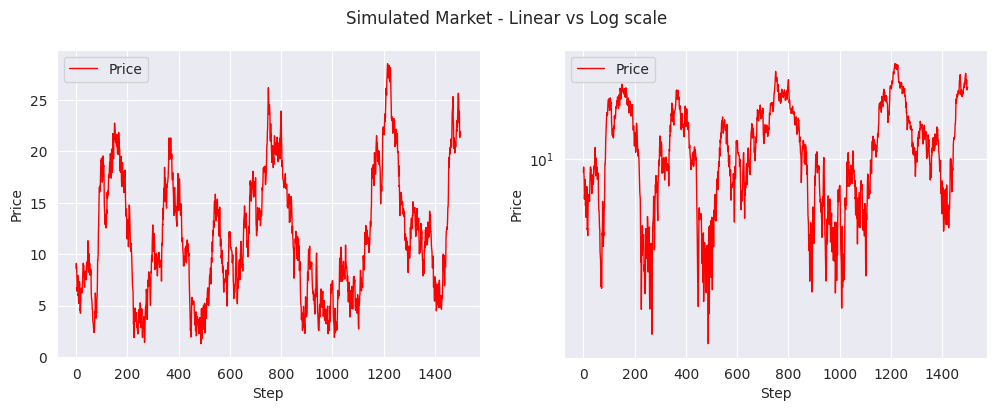

In [117]:
compare_lin_log_scale(model_vars.Price)

## Batch-run

In [118]:
# Shark DOFs
model_111 = pd.read_csv(f'../data/{path_111}.csv').drop(columns = 'Unnamed: 0')
model_112 = pd.read_csv(f'../data/{path_112}.csv').drop(columns = 'Unnamed: 0')

model_121 = pd.read_csv(f'../data/{path_121}.csv').drop(columns = 'Unnamed: 0')
model_122 = pd.read_csv(f'../data/{path_122}.csv').drop(columns = 'Unnamed: 0')

model_211 = pd.read_csv(f'../data/{path_211}.csv').drop(columns = 'Unnamed: 0')
model_212 = pd.read_csv(f'../data/{path_212}.csv').drop(columns = 'Unnamed: 0')

model_221 = pd.read_csv(f'../data/{path_221}.csv').drop(columns = 'Unnamed: 0')
model_222 = pd.read_csv(f'../data/{path_222}.csv').drop(columns = 'Unnamed: 0')

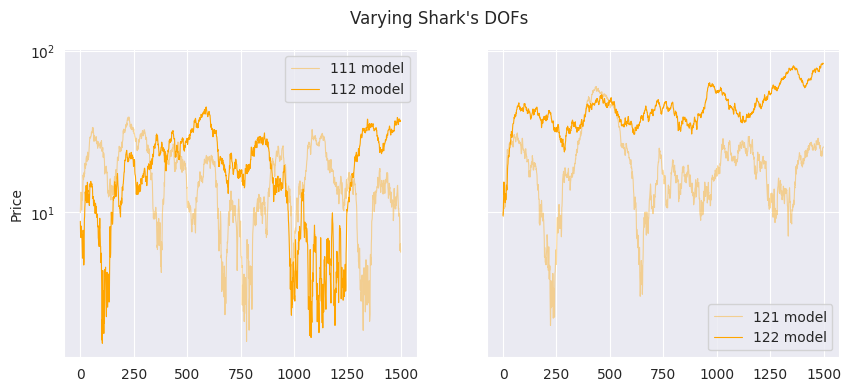

In [119]:
fig, axs = plt.subplots(ncols = 2, figsize = (10, 4), sharey = True)
fig.suptitle("Varying Shark's DOFs")

sns.lineplot(
    data = model_111.Price, label = '111 model', ax = axs[0], lw = 0.8, color = 'orange', alpha = 0.4
)
sns.lineplot(
    data = model_112.Price, label = '112 model', ax = axs[0], lw = 0.8, color = 'orange'
)

sns.lineplot(
    data = model_121.Price, label = '121 model', ax = axs[1], lw = 0.8, color = 'orange', alpha = 0.4
)
sns.lineplot(
    data = model_122.Price, label = '122 model', ax = axs[1], lw = 0.8, color = 'orange'
)

axs[0].legend(); axs[1].legend()
axs[0].set_yscale('log'); axs[1].set_yscale('log')
plt.show();

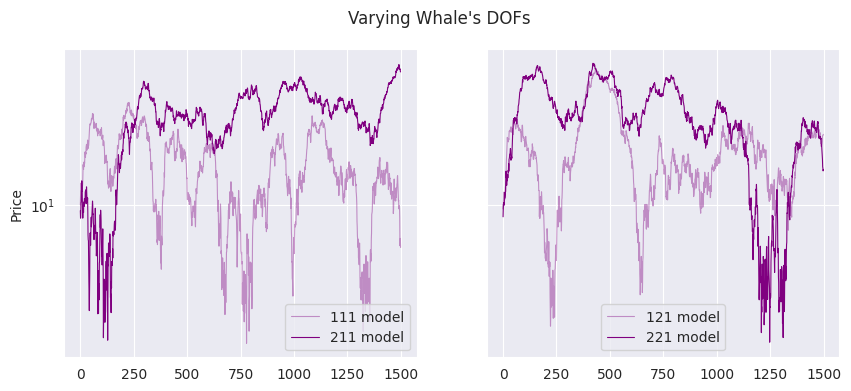

In [120]:
fig, axs = plt.subplots(ncols = 2, figsize = (10, 4), sharey = True)
fig.suptitle("Varying Whale's DOFs")

sns.lineplot(
    data = model_111.Price, label = '111 model', ax = axs[0], lw = 0.8, color = 'purple', alpha = 0.4
)
sns.lineplot(
    data = model_211.Price, label = '211 model', ax = axs[0], lw = 0.8, color = 'purple'
)

sns.lineplot(
    data = model_121.Price, label = '121 model', ax = axs[1], lw = 0.8, color = 'purple', alpha = 0.4
)
sns.lineplot(
    data = model_221.Price, label = '221 model', ax = axs[1], lw = 0.8, color = 'purple'
)

axs[0].legend(); axs[1].legend()
axs[0].set_yscale('log'); axs[1].set_yscale('log')
plt.show();

In [121]:
# Do the fish

## Compare Returns

In [122]:
s_ret_old = get_returns(old_model)

sim_price_history = model_vars['Price']
s_ret = get_returns(sim_price_history)

In [123]:
r_ret_list = list()
for data in data_list:
    real_price_history = data['Close'].drop(columns = ['Date'], axis = 1)
    r_ret_list.append(get_returns(real_price_history))

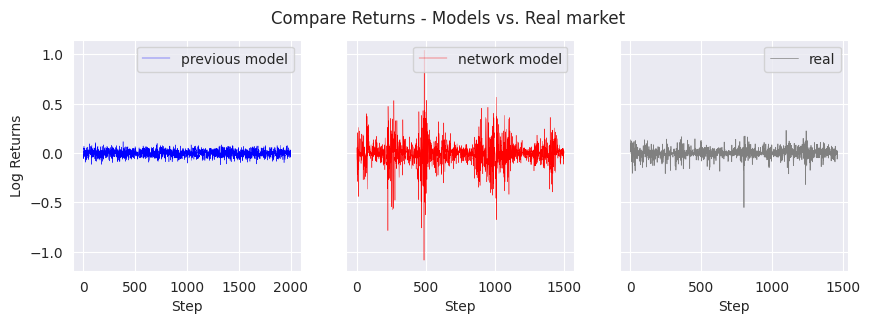

In [124]:
compare_returns(r_ret_list[1], s_ret, s_ret_old)

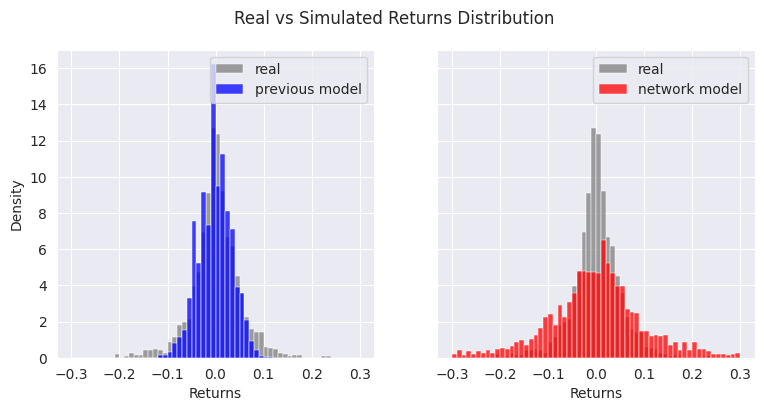

In [125]:
compare_returns_distribution(r_ret_list[1], s_ret, s_ret_old)

In [126]:
r_kurtosis_list = list()
for r_ret in r_ret_list:
    r_kurtosis_list.append(stats.kurtosis(r_ret[1:]))

mean_real_kurtosis = round(np.mean(r_kurtosis_list), 3)
kurtosis_sigma = round(np.sqrt(np.var(r_kurtosis_list)), 3)

In [131]:
print(f'Real Market Kurtosis: {mean_real_kurtosis} +- {kurtosis_sigma}')

Real Market Kurtosis: 10.009 +- 3.995


## Load ALL Models

In [204]:
# Models with 1500 steps
models = [
    model_111, model_112, model_121, model_122,
    model_211, model_212, model_221, model_222
]

# Models from little batchruns
path = f'../data/stat_an'
params = '100-25&10-10&15'
for run in range(10):
    filename = f'{path}/{run:02d}_model_vars_{params}.csv'
    models.append(pd.read_csv(filename).drop(columns = 'Unnamed: 0'))
    
params = '100-25&20-10&15'
for run in range(6):
    filename = f'{path}/{run:02d}_model_vars_{params}.csv'
    models.append(pd.read_csv(filename).drop(columns = 'Unnamed: 0'))

## Compare Kurtosis

In [235]:
s_kurtosis = list()
for model_vars in models:
    kurt = stats.kurtosis(get_returns(model_vars['Price']))
    if kurt < 40:
        s_kurtosis.append(kurt)

In [236]:
s_kurtosis

[10.18961489421981,
 9.53357028319431,
 7.198335297336525,
 5.574378030234978,
 27.731311755014502,
 7.518802868994957,
 23.40496340362796,
 26.017628990038432,
 16.851753367900766,
 3.8315571584515524,
 26.59278649701551,
 1.8443947439757826,
 20.123471107619263,
 1.3265292151956478,
 6.593508168661575,
 9.964788855289369,
 7.523942444429794,
 14.252244322430354,
 9.386224624143237,
 26.015194409298978,
 2.174692117148898,
 9.461355074732952]

In [237]:
mean_sim_kurtosis = round(np.mean(s_kurtosis), 3)
sim_kurtosis_sigma = round(np.sqrt(np.var(s_kurtosis)), 3)

In [238]:
print(f'Model Kurtosis: {mean_sim_kurtosis} +- {sim_kurtosis_sigma}')

Model Kurtosis: 12.414 +- 8.568


In [243]:
import math

def z_test(real_value, real_error, estimated_value, estimated_error):
    # Calculate the standard deviation of the difference
    diff_std = math.sqrt(real_error**2 + estimated_error**2)
    
    # Calculate the difference between the values
    diff = real_value - estimated_value
    
    # Calculate the z-score
    z_score = abs(diff / diff_std)
    print(z_score)
    # Set the desired significance level (e.g., 0.05 for 95% confidence)
    significance_level = 0.05
    
    # Calculate the critical z-value for the given significance level
    critical_value = 1.96  # Assuming a two-tailed test
    
    # Compare the z-score with the critical value
    if z_score > critical_value:
        print("The values are statistically different.")
    else:
        print("The values are statistically the same.")

In [244]:
z_test(mean_real_kurtosis, kurtosis_sigma, mean_sim_kurtosis, sim_kurtosis_sigma)

0.2544003033513368
The values are statistically the same.


# Augmented Dickey-Fuller
A time series is said to be “stationary” if it has no trend, exhibits constant variance over time, and has a constant autocorrelation structure over time.  
One way to test whether a time series is stationary is to perform an augmented Dickey-Fuller test, which uses the following null and alternative hypotheses:  
- H0: The time series is non-stationary. In other words, it has some time-dependent structure and does not have constant variance over time.  
- HA: The time series is stationary.

So:
- p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
- p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [144]:
print('Null Hypothesis: The time series is non-stationary (there IS a unit root).')

r_ret_list = list()
for idx, data in enumerate(data_list):
    real_price_history = data['Close'].drop(columns = ['Date'], axis = 1)

    r_stat, r_pval = get_aDF_test(real_price_history)
    print(f'{tickers[idx]} -> Test Statistic: {r_stat:.2f},\tTest p-value: {r_pval:.2f}')

Null Hypothesis: The time series is non-stationary (there IS a unit root).
BTC-USD -> Test Statistic: -0.64,	Test p-value: 0.86
ETH-USD -> Test Statistic: 0.27,	Test p-value: 0.98
ADA-USD -> Test Statistic: -1.27,	Test p-value: 0.64
BNB-USD -> Test Statistic: -0.45,	Test p-value: 0.90
LTC-USD -> Test Statistic: -2.15,	Test p-value: 0.23
BNB-USD -> Test Statistic: -0.45,	Test p-value: 0.90
XRP-USD -> Test Statistic: -2.84,	Test p-value: 0.05
TRX-USD -> Test Statistic: -2.33,	Test p-value: 0.16
XMR-USD -> Test Statistic: -2.24,	Test p-value: 0.19
VET-USD -> Test Statistic: -1.98,	Test p-value: 0.30
LINK-USD -> Test Statistic: -1.36,	Test p-value: 0.60
CELR-USD -> Test Statistic: -1.75,	Test p-value: 0.41
QNT-USD -> Test Statistic: -0.98,	Test p-value: 0.76
ETC-USD -> Test Statistic: -2.01,	Test p-value: 0.28
FTM-USD -> Test Statistic: -0.06,	Test p-value: 0.95
ZIL-USD -> Test Statistic: -1.68,	Test p-value: 0.44
BAT-USD -> Test Statistic: -0.86,	Test p-value: 0.80


In [205]:
print('Null Hypothesis: The time series is non-stationary (there IS a unit root).')

path = f'../data/stat_an'
params = '100-25&10-10&15'
s_kurtosis = list()
for model_vars in models:
    sim_price_history = model_vars['Price']
    s_stat, s_pval = get_aDF_test(sim_price_history)
    print(f'Test Statistic: {s_stat:.2f},\tTest p-value: {s_pval:.2f}')

Null Hypothesis: The time series is non-stationary (there IS a unit root).
Test Statistic: -2.37,	Test p-value: 0.15
Test Statistic: -1.65,	Test p-value: 0.45
Test Statistic: -1.69,	Test p-value: 0.44
Test Statistic: -1.57,	Test p-value: 0.50
Test Statistic: -1.54,	Test p-value: 0.51
Test Statistic: -2.87,	Test p-value: 0.05
Test Statistic: -1.85,	Test p-value: 0.36
Test Statistic: -1.78,	Test p-value: 0.39
Test Statistic: -1.43,	Test p-value: 0.57
Test Statistic: -1.06,	Test p-value: 0.73
Test Statistic: -1.53,	Test p-value: 0.52
Test Statistic: -1.69,	Test p-value: 0.44
Test Statistic: -1.01,	Test p-value: 0.75
Test Statistic: -3.40,	Test p-value: 0.01
Test Statistic: -1.99,	Test p-value: 0.29
Test Statistic: -1.91,	Test p-value: 0.33
Test Statistic: -1.55,	Test p-value: 0.51
Test Statistic: -1.98,	Test p-value: 0.29
Test Statistic: -2.01,	Test p-value: 0.28
Test Statistic: -1.96,	Test p-value: 0.31
Test Statistic: -1.68,	Test p-value: 0.44
Test Statistic: -0.69,	Test p-value: 0.85
T

## Volat Clustering

In [160]:
lags = range(21)

In [ ]:
def plot_ACF(price_history, lags, title): # pass prices as df
    log_returns_acf, absolute_returns_acf = calc_ACF(price_history, lags)
    
    fig, axs = plt.subplots(ncols = 2, figsize = (12, 5))
    fig.suptitle(f'{title}')
    axs[0].stem(lags, log_returns_acf)
    axs[1].stem(lags, absolute_returns_acf)

    axs[0].set(xlabel = 'Lag', ylabel = 'ACF of Log Returns');
    axs[1].set(xlabel = 'Lag', ylabel = 'ACF of Absolute Returns')

    plt.tight_layout()
    plt.show();

In [178]:
# BTC-USD
real_price_history = data_list[0]['Close'].drop(columns = ['Date'], axis = 1)
old_sim_price_history = old_model['Price']
sim_price_history = models[3]['Price']

In [179]:
# Calc ACF
r_log_ret_acf, r_abs_ret_acf = calc_ACF(real_price_history, lags)
o_log_ret_acf, o_abs_ret_acf = calc_ACF(old_sim_price_history, lags)
s_log_ret_acf, s_abs_ret_acf = calc_ACF(sim_price_history, lags)

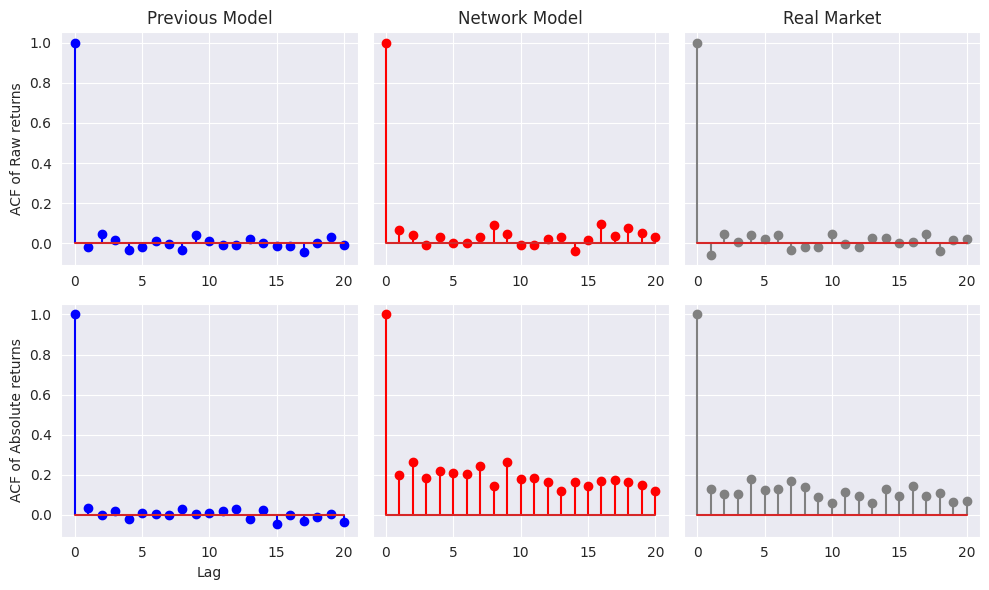

In [180]:
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (10, 6), sharey = True)

axs[0][0].stem(lags, o_log_ret_acf, 'b'); axs[0][0].set(title = 'Previous Model', ylabel = 'ACF of Raw returns')
axs[1][0].stem(lags, o_abs_ret_acf, 'b'); axs[1][0].set(xlabel = 'Lag', ylabel = 'ACF of Absolute returns')

axs[0][1].stem(lags, s_log_ret_acf, 'r'); axs[0][1].set(title = 'Network Model')
axs[1][1].stem(lags, s_abs_ret_acf, 'r')

axs[0][2].stem(lags, r_log_ret_acf, 'gray'); axs[0][2].set(title = 'Real Market')
axs[1][2].stem(lags, r_abs_ret_acf, 'gray')

plt.tight_layout()
plt.show();

In [188]:
def get_stats(log_ret_acf, abs_ret_acf):
    log_ret_acf.pop(0); abs_ret_acf.pop(0)
    
    raw_mean = np.array(log_ret_acf).mean()
    raw_std = np.array(log_ret_acf).std()

    abs_mean = np.array(abs_ret_acf).mean()
    abs_std = np.array(abs_ret_acf).std()
    
    n_decimals = 4
    print(f'Raw: {round(raw_mean, n_decimals)} +- {round(raw_std, n_decimals)}')
    print(f'Abs: {round(abs_mean, n_decimals)} +- {round(abs_std, n_decimals)}\n')

In [189]:
get_stats(o_log_ret_acf, o_abs_ret_acf)
get_stats(s_log_ret_acf, s_abs_ret_acf)
get_stats(r_log_ret_acf, r_abs_ret_acf)

Raw: -0.0013 +- 0.024
Abs: 0.0003 +- 0.0217

Raw: 0.0294 +- 0.0341
Abs: 0.1819 +- 0.0411

Raw: 0.0067 +- 0.0303
Abs: 0.1086 +- 0.0327



In [223]:
# Batchrun-it
raw_means = list(); raw_stds = list()
abs_means = list(); abs_stds = list()

for model in models:
    sim_price_history = model['Price']
    s_log_ret_acf, s_abs_ret_acf = calc_ACF(sim_price_history, lags)
    s_log_ret_acf.pop(0); s_abs_ret_acf.pop(0)
    
    raw_means.append(np.array(s_log_ret_acf).mean())
    abs_means.append(np.array(s_abs_ret_acf).mean())
    
    raw_stds.append(np.array(s_log_ret_acf).std())
    abs_stds.append(np.array(s_abs_ret_acf).std())

In [224]:
n_decimals = 3
mean_raw = round(np.array(raw_means).mean(), n_decimals); err_raw = round(np.array(raw_means).std()/np.sqrt(len(raw_means)), n_decimals)
mean_abs = round(np.array(abs_means).mean(), n_decimals); err_abs = round(np.array(abs_means).std()/np.sqrt(len(abs_means)), n_decimals)

In [225]:
print(f'{mean_raw} +- {err_raw}')
print(f'{mean_abs} +- {err_abs}')

-0.002 +- 0.003
0.293 +- 0.02


In [226]:
# Batchrun-it REAL
raw_means = list(); raw_stds = list()
abs_means = list(); abs_stds = list()

for data in data_list:
    real_price_history = data['Close'].drop(columns = ['Date'], axis = 1)

    r_log_ret_acf, r_abs_ret_acf = calc_ACF(real_price_history, lags)
    r_log_ret_acf.pop(0); r_abs_ret_acf.pop(0)
    
    raw_means.append(np.array(r_log_ret_acf).mean())
    abs_means.append(np.array(r_abs_ret_acf).mean())
    
    raw_stds.append(np.array(r_log_ret_acf).std())
    abs_stds.append(np.array(r_abs_ret_acf).std())

In [227]:
n_decimals = 3
mean_raw = round(np.array(raw_means).mean(), n_decimals); err_raw = round(np.array(raw_means).std()/np.sqrt(len(raw_means)), n_decimals)
mean_abs = round(np.array(abs_means).mean(), n_decimals); err_abs = round(np.array(abs_means).std()/np.sqrt(len(abs_means)), n_decimals)

In [228]:
print(f'{mean_raw} +- {err_raw}')
print(f'{mean_abs} +- {err_abs}')

0.005 +- 0.001
0.102 +- 0.006
